Nhập thư viện và đọc dữ liệu từ file

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from scipy.stats import poisson

df = pd.read_csv("data.csv", sep=";")

## 1. Khám phá dữ liệu (Exploratory Data Analysis - EDA)

### a. Tóm tắt thông tin dữ liệu:

In [2]:
df.describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [44]:
df.shape

(4424, 37)

In [45]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd s

In [3]:
df.head(5)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


cái df này nó chỉ có cột target là cat thôi vì trên uci nó đã label encode r lọc ra thành mấy cột integer r nên h đi tìm lại để tìm tương quan

In [4]:
cat_cols = df.select_dtypes(include=["object"])
print(cat_cols.columns)

Index(['Target'], dtype='object')


In [5]:
num_cols = df.select_dtypes(include=["number"])
print(num_cols.columns)

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [6]:
cat_like = [col for col in df.columns if df[col].nunique() < 50]
print(cat_like)

['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP', 'Target']


In [7]:
quantiative_columns = [
    "Age at enrollment",
    "Curricular units 1st sem (credited)",
    "Curricular units 1st sem (enrolled)",
    "Curricular units 1st sem (evaluations)",
    "Curricular units 1st sem (approved)",
    "Curricular units 1st sem (without evaluations)",
    "Curricular units 2nd sem (credited)",
    "Curricular units 2nd sem (enrolled)",
    "Curricular units 2nd sem (evaluations)",
    "Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (without evaluations)",
    "Unemployment rate",
    "Inflation rate",
    "GDP",
    "Curricular units 1st sem (grade)",
    "Curricular units 2nd sem (grade)"
]

cat_columns = [col for col in cat_like if col not in quantiative_columns]
ordinal_column = ["Application order"]
print(cat_columns)

['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International', 'Target']


#### Kiểm tra số lượng bản ghi, số lượng biến số, kiểu dữ liệu của từng biến.


In [8]:
print(df.dtypes)

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [9]:
df.shape

(4424, 37)

#### Xử lý dữ liệu thiếu, dữ liệu trùng lặp (nếu có).


In [10]:
print(df.isna().sum())
print(df.isnull().sum())

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [ ]:
print(df.duplicated().any())
print(df.duplicated().sum())

False
0


In [49]:
print(df["Target"].value_counts())


Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


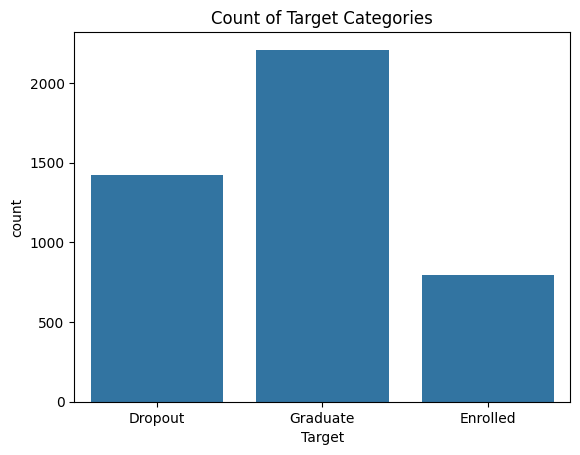

In [50]:
sns.countplot(data=df, x="Target")
plt.title("Count of Target Categories")
plt.show()


### b. Phân tích thống kê mô tả

#### Tính các thống kê như trung bình, trung vị, độ lệch chuẩn, tứ phân vị.


In [11]:
df_numeric = df.drop(columns=cat_columns)
df_numeric.describe()

,Previous qualification (grade),Admission grade,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,132.613314,126.978119,23.265145,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,13.188332,14.482001,7.587816,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,95.000000,95.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,125.000000,117.900000,19.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,133.100000,126.100000,20.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,140.000000,134.800000,25.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,190.000000,190.000000,70.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


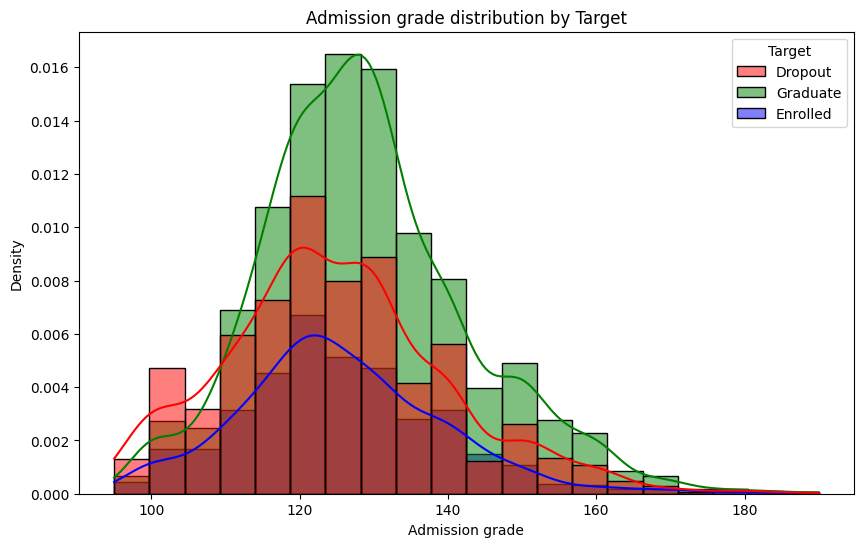

In [12]:
plt.figure(figsize=(10, 6))

# Histogram split by target
sns.histplot(
    data=df,
    x="Admission grade",
    hue="Target",  # separates Dropout vs Graduate
    bins=20,  # adjust for clarity
    kde=True,  # optional: overlay density
    stat="density",  # normalize for comparison
    palette=["red", "green", "blue"],
    alpha=0.5,
)

plt.title("Admission grade distribution by Target")
plt.xlabel("Admission grade")
plt.ylabel("Density")
plt.show()

#### Trực quan hoá bằng các biểu đồ phù hợp (ít nhất 3 loại biểu đồ) để nhận

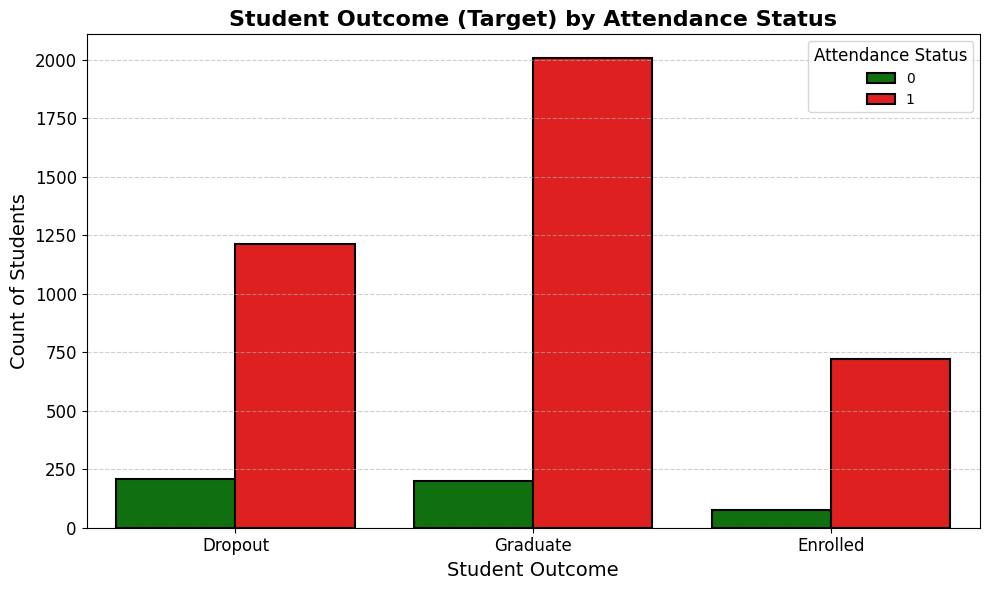

In [13]:
plt.figure(figsize=(10, 6))

# Create a countplot:
# x-axis: The outcome (Target)
# hue: The secondary variable used to group the bars (Attendance Status)
# palette: Uses the same color scheme as the previous example (reds/greens) for consistency
sns.countplot(
    data=df,
    x="Target",
    hue="Daytime/evening attendance\t",
    palette={"green", "red"},
    edgecolor="black",
    linewidth=1.5,
)

# --- 3. CUSTOMIZE PLOT AESTHETICS ---
plt.title(
    "Student Outcome (Target) by Attendance Status", fontsize=16, fontweight="bold"
)
plt.xlabel("Student Outcome", fontsize=14)
plt.ylabel("Count of Students", fontsize=14)
plt.legend(title="Attendance Status", title_fontsize="12", fontsize="10")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

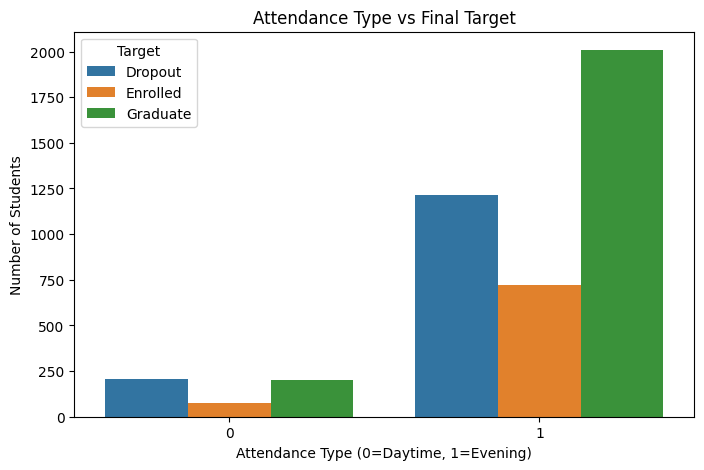

In [14]:
# Assuming df is your DataFrame
attendance_col = (
    "Daytime/evening attendance\t"  # keep the tab if it's in the column name
)
target_col = "Target"

# Count occurrences
counts = df.groupby([attendance_col, target_col]).size().reset_index(name="count")

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=counts, x=attendance_col, y="count", hue=target_col)
plt.xlabel("Attendance Type (0=Daytime, 1=Evening)")
plt.ylabel("Number of Students")
plt.title("Attendance Type vs Final Target")
plt.legend(title="Target")
plt.show()

this data makes sense specially for this dataset since this is A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies. 

i.e. they have jobs in the day


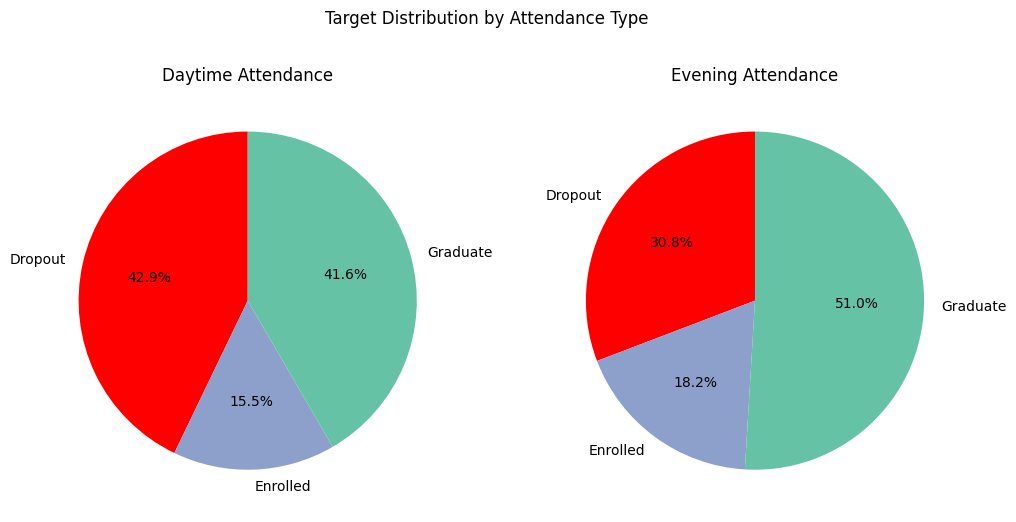

In [15]:
attendance_col = "Daytime/evening attendance\t"
target_col = "Target"

categories = ["Dropout", "Enrolled", "Graduate"]

daytime_counts = (
    df[df[attendance_col] == 0][target_col].value_counts().reindex(categories)
)
evening_counts = (
    df[df[attendance_col] == 1][target_col].value_counts().reindex(categories)
)

# Create two side-by-side pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(
    daytime_counts,
    labels=daytime_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=["#ff0000", "#8da0cb", "#66c2a5"],
)
axes[0].set_title("Daytime Attendance")

axes[1].pie(
    evening_counts,
    labels=evening_counts.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=["#ff0000", "#8da0cb", "#66c2a5"],
)
axes[1].set_title("Evening Attendance")

plt.suptitle("Target Distribution by Attendance Type")
plt.show()

this one shows percantage

Same thing but for scholarship (this should be obvious)

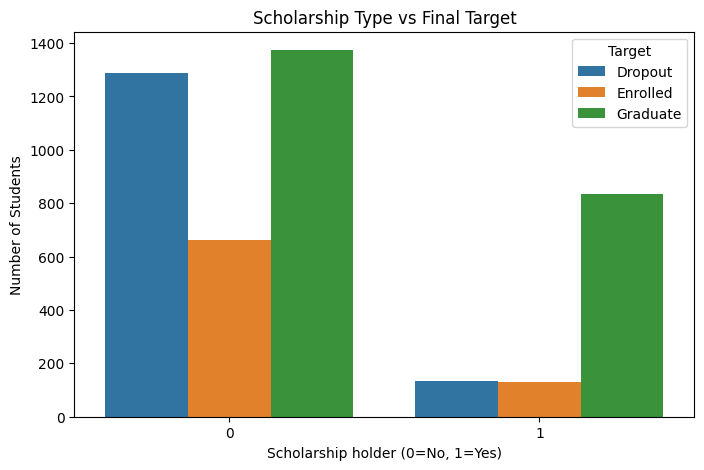

In [16]:
var_col = "Scholarship holder"  # keep the tab if it's in the column name
target_col = "Target"

# Count occurrences
counts = df.groupby([var_col, target_col]).size().reset_index(name="count")

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(data=counts, x=var_col, y="count", hue=target_col)
plt.xlabel("Scholarship holder (0=No, 1=Yes)")
plt.ylabel("Number of Students")
plt.title("Scholarship Type vs Final Target")
plt.legend(title="Target")
plt.show()

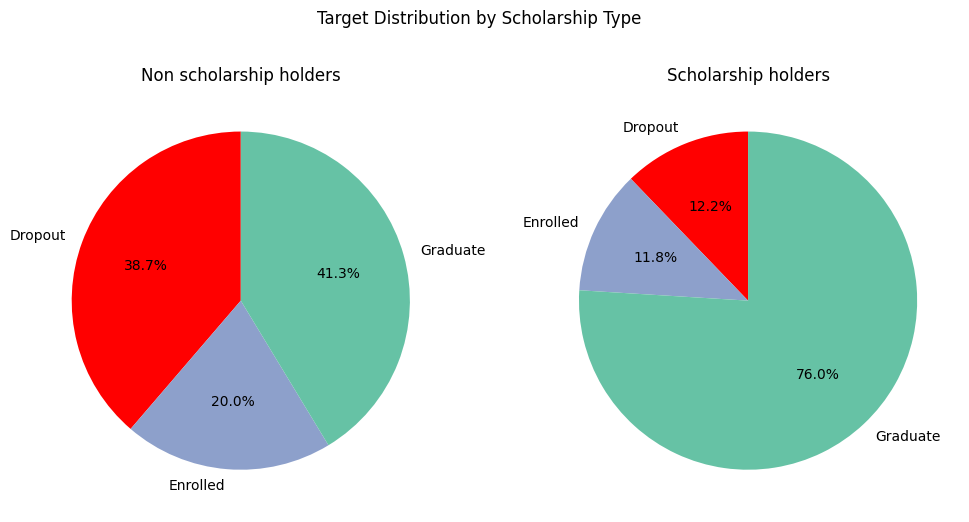

In [17]:
var_col = "Scholarship holder"
target_col = "Target"

categories = ["Dropout", "Enrolled", "Graduate"]

no = df[df[var_col] == 0][target_col].value_counts().reindex(categories)
yes = df[df[var_col] == 1][target_col].value_counts().reindex(categories)

# Create two side-by-side pie charts
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(
    no,
    labels=no.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=["#ff0000", "#8da0cb", "#66c2a5"],
)
axes[0].set_title("Non scholarship holders")

axes[1].pie(
    yes,
    labels=yes.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=["#ff0000", "#8da0cb", "#66c2a5"],
)
axes[1].set_title("Scholarship holders")

plt.suptitle("Target Distribution by Scholarship Type")
plt.show()

### c. Phát hiện dữ liệu ngoại lai

Sử dụng IQR (Interquartile Range)

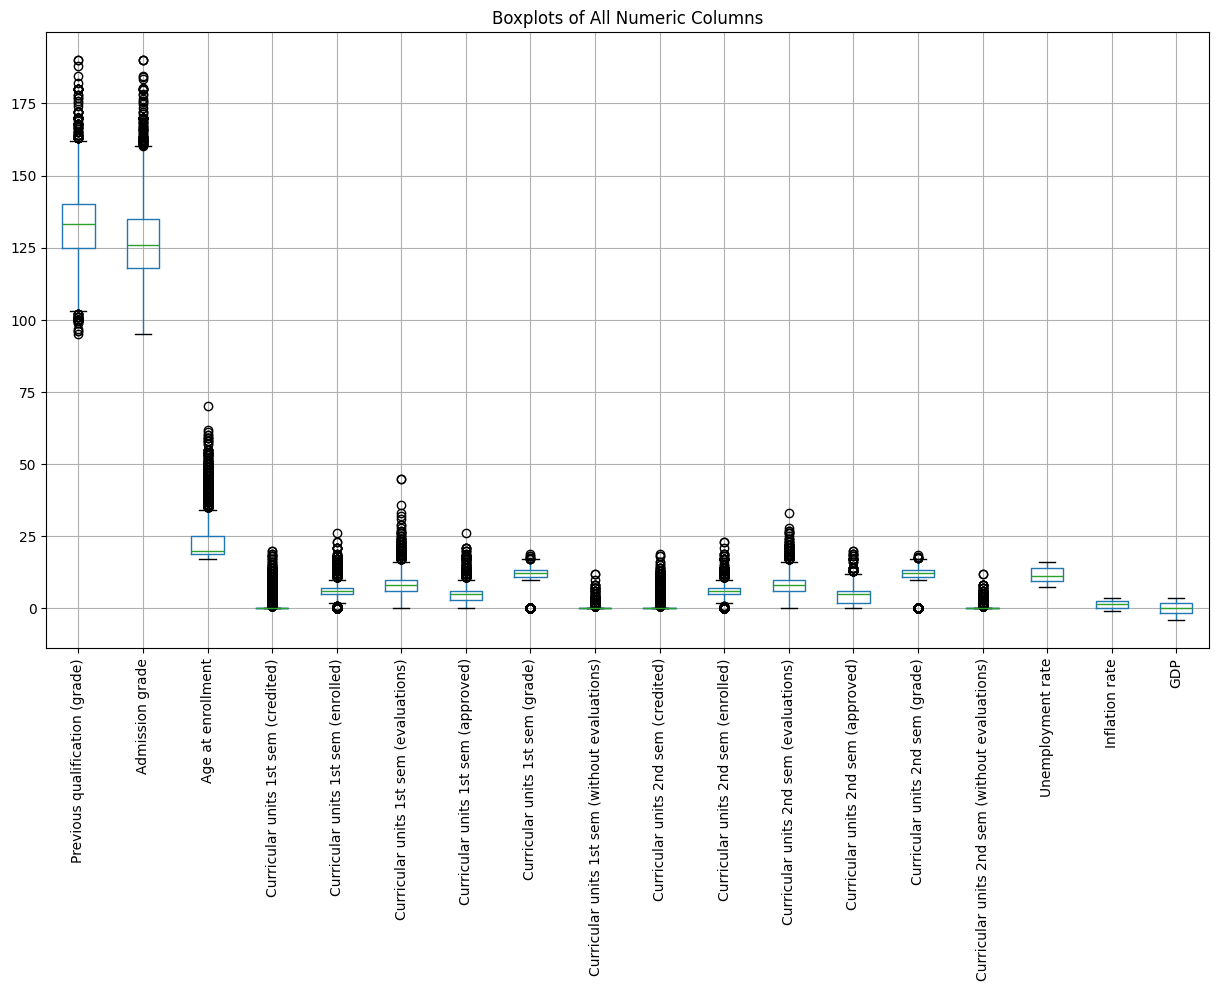

In [18]:
plt.figure(figsize=(15, 8))
df_numeric.boxplot(rot=90)  # rot=90 to rotate x-axis labels
plt.title("Boxplots of All Numeric Columns")
plt.show()

**investigating gdp, inflation and unemployment**


In [19]:
new_df = df[["GDP", "Unemployment rate", "Inflation rate"]]
new_df.describe()

,GDP,Unemployment rate,Inflation rate
count,4424.000000,4424.000000,4424.000000
mean,0.001969,11.566139,1.228029
std,2.269935,2.663850,1.382711
min,-4.060000,7.600000,-0.800000
25%,-1.700000,9.400000,0.300000
50%,0.320000,11.100000,1.400000
75%,1.790000,13.900000,2.600000
max,3.510000,16.200000,3.700000


Knowing that the data comes from the Instituto Politécnico de Portalegre (IPP) in Portugal directly confirms two key points that validate our previous investigation:

Country: The economic data is relevant to Portugal.

Context: The data is from a Portuguese polytechnic institute during a specific time period.

| Metric            | Range (Min to Max) | Confirmed Context                                                                 | Conclusion                                           |
|------------------|-------------------|----------------------------------------------------------------------------------|----------------------------------------------------|
| Unemployment Rate | 7.6% to 16.2%     | Matches the severe economic crisis and subsequent recovery in Portugal (roughly 2008–2018). | Plausible. The highest values are likely accurate historical peaks. |
| Inflation Rate    | -0.8% to 3.7%     | Matches Portugal's largely stable, low-inflation environment during that period, including some deflationary dips. | Plausible. Very stable and reliable data.         |
| GDP               | -4.06 to 3.51     | Matches Portugal's sharp recessionary decline followed by years of recovery growth. | Plausible. Represents real economic volatility.   |


phương pháp xử lý đề xuất (cho mấy cột trên với lại mấy cái course)

***!!!Square Root Transformation!!!***
might or might or have to do this

You only transform the distribution (log/square root) for features that are highly skewed (like GDP and Curricular Units). You must apply scaling to every continuous numeric column to ensure no single variable dominates your model due to its large value range.

***NHẬN XÉT TỔNG QUAN SO FAR***

In [20]:
df_numeric.columns

Index(['Previous qualification (grade)', 'Admission grade',
       'Age at enrollment', 'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP'],
      dtype='object')

In [21]:
from scipy.stats import norm
import numpy as np

## 2. Phân tích phân phối xác suất

#### Chọn ít nhất hai biến số quan trọng và kiểm tra xem nó có tuân theo phân phối xác suất nào không (chuẩn, Poisson, exponential…) sử dụng biểu đồ phù hợp để minh hoạ.

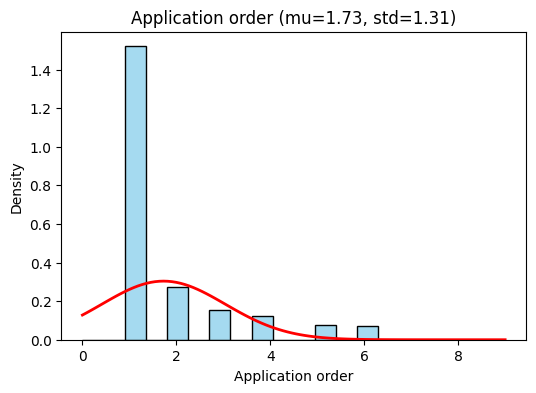

In [22]:
col = "Application order"
data = df[col].dropna()  # drop NaN values
mu, std = norm.fit(data)  # fit a normal distribution

plt.figure(figsize=(6, 4))
# Histogram
sns.histplot(data, bins=20, kde=False, color="skyblue", stat="density")
# Plot Gaussian
xmin, xmax = data.min(), data.max()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, "r", linewidth=2)

plt.title(f"{col} (mu={mu:.2f}, std={std:.2f})")
plt.xlabel(col)
plt.ylabel("Density")
plt.show()

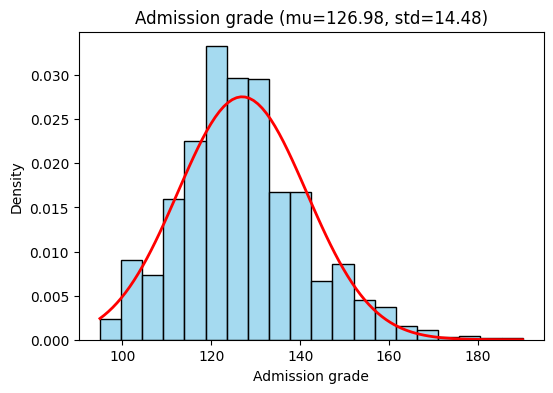

In [23]:
col = "Admission grade"
data = df_numeric[col].dropna()  # drop NaN values
mu, std = norm.fit(data)  # fit a normal distribution

plt.figure(figsize=(6, 4))
# Histogram
sns.histplot(data, bins=20, kde=False, color="skyblue", stat="density")
# Plot Gaussian
xmin, xmax = data.min(), data.max()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, "r", linewidth=2)

plt.title(f"{col} (mu={mu:.2f}, std={std:.2f})")
plt.xlabel(col)
plt.ylabel("Density")
plt.show()

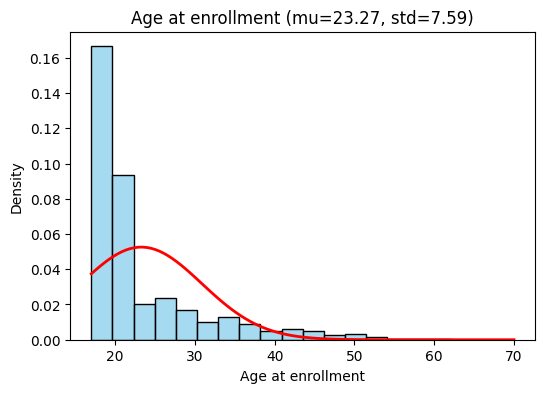

In [24]:
col = "Age at enrollment"
data = df_numeric[col].dropna()  # drop NaN values
mu, std = norm.fit(data)  # fit a normal distribution

plt.figure(figsize=(6, 4))
# Histogram
sns.histplot(data, bins=20, kde=False, color="skyblue", stat="density")
# Plot Gaussian
xmin, xmax = data.min(), data.max()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, "r", linewidth=2)

plt.title(f"{col} (mu={mu:.2f}, std={std:.2f})")
plt.xlabel(col)
plt.ylabel("Density")
plt.show()

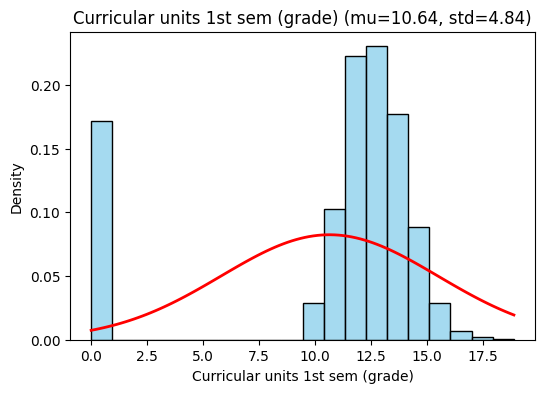

In [25]:
col = "Curricular units 1st sem (grade)"
data = df_numeric[col].dropna()  # drop NaN values
mu, std = norm.fit(data)  # fit a normal distribution

plt.figure(figsize=(6, 4))
# Histogram
sns.histplot(data, bins=20, kde=False, color="skyblue", stat="density")
# Plot Gaussian
xmin, xmax = data.min(), data.max()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, "r", linewidth=2)

plt.title(f"{col} (mu={mu:.2f}, std={std:.2f})")
plt.xlabel(col)
plt.ylabel("Density")
plt.show()

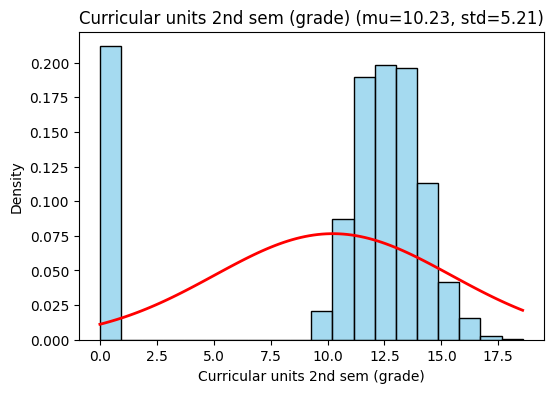

In [26]:
col = "Curricular units 2nd sem (grade)"
data = df_numeric[col].dropna()  # drop NaN values
mu, std = norm.fit(data)  # fit a normal distribution

plt.figure(figsize=(6, 4))
# Histogram
sns.histplot(data, bins=20, kde=False, color="skyblue", stat="density")
# Plot Gaussian
xmin, xmax = data.min(), data.max()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, "r", linewidth=2)

plt.title(f"{col} (mu={mu:.2f}, std={std:.2f})")
plt.xlabel(col)
plt.ylabel("Density")
plt.show()

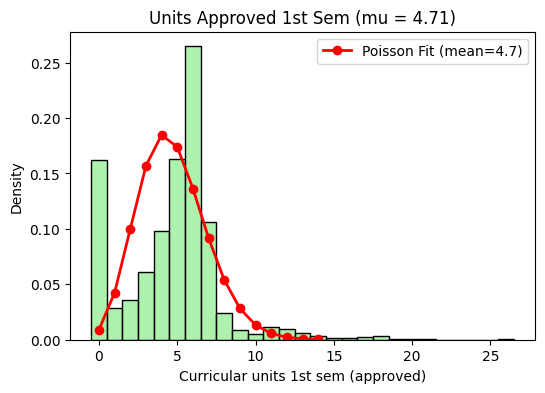

In [27]:
# Vì là biến rời rạc, ta so sánh Histogram với các điểm xác suất Poisson
plt.figure(figsize=(6, 4))
sns.histplot(
    df["Curricular units 1st sem (approved)"],
    discrete=True,
    stat="density",
    color="lightgreen",
)
mu_pois = df["Curricular units 1st sem (approved)"].mean()
x_pois = np.arange(0, 15)
p_pois = poisson.pmf(x_pois, mu_pois)
plt.plot(x_pois, p_pois, "ro-", linewidth=2, label=f"Poisson Fit (mean={mu_pois:.1f})")
plt.title(f"Units Approved 1st Sem (mu = {mu_pois:.2f})")
plt.legend()
plt.show()

## 3. Kiểm định giả thuyết

### a. Tìm hiểu và trình bày các kiểm định thống kê sau: t-test, Chi-square và ANOVA.

### b. Đề xuất hai câu hỏi nghiên cứu có thể kiểm định bằng dữ liệu cho bộ dữ liệu đã chọn

câu hỏi: giới tính khác nhau có ảnh hưởng đến cái dropout rate hay ko

In [28]:
import pandas as pd
from scipy.stats import chi2_contingency

# Tạo bảng tần số (contingency table)
table = pd.crosstab(df["Gender"], df["Target"])
print(table)

Target  Dropout  Enrolled  Graduate
Gender                             
0           720       487      1661
1           701       307       548


In [29]:
chi2, p, dof, expected = chi2_contingency(table)
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-square statistic: 233.26643249623856
p-value: 2.2224795668092454e-51
Degrees of freedom: 2
Expected frequencies:
 [[ 921.20886076  514.73598553 1432.05515371]
 [ 499.79113924  279.26401447  776.94484629]]


Null hypothesis (H0): Giới tính và kết quả học tập không liên quan (độc lập)

Alternative hypothesis (H1): Có sự phụ thuộc giữa giới tính và kết quả học tập

Nếu p < 0.05 → bác bỏ H0 → có sự khác biệt có ý nghĩa

Nếu p >= 0.05 → không bác bỏ H0 → không có bằng chứng về sự khác biệt

Vì p << 0.05, chúng ta bác bỏ H0 → kết luận:

Có sự khác biệt rất rõ ràng về kết quả học tập giữa nam và nữ. Giới tính và Target không độc lập trong dữ liệu này.

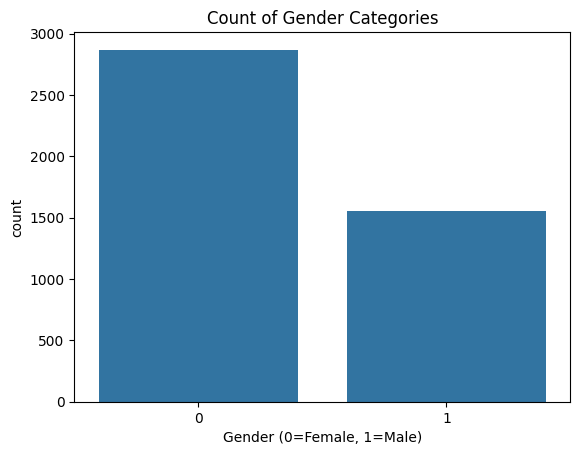

In [52]:
sns.countplot(data=df, x="Gender")
plt.xlabel("Gender (0=Female, 1=Male)")
plt.title("Count of Gender Categories")
plt.show()


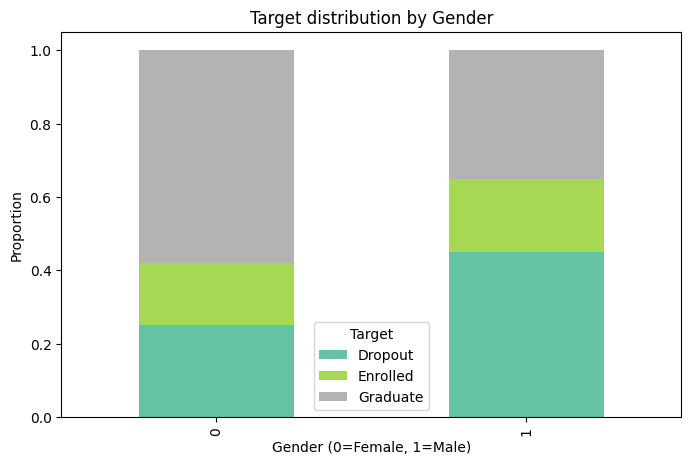

In [53]:
table_norm = table.div(table.sum(axis=1), axis=0)  # chuyển sang tỉ lệ %
table_norm.plot(kind="bar", stacked=True, figsize=(8, 5), colormap="Set2")

plt.ylabel("Proportion")
plt.xlabel("Gender (0=Female, 1=Male)")
plt.title("Target distribution by Gender")
plt.show()

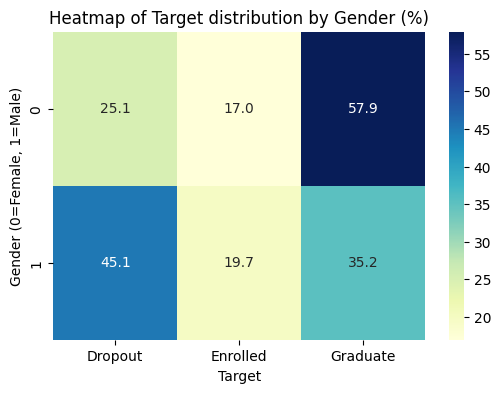

In [54]:
import seaborn as sns

# Bảng tỉ lệ %
table_percent = table.div(table.sum(axis=1), axis=0) * 100

plt.figure(figsize=(6, 4))
sns.heatmap(table_percent, annot=True, fmt=".1f", cmap="YlGnBu")
plt.xlabel("Target")
plt.ylabel("Gender (0=Female, 1=Male)")
plt.title("Heatmap of Target distribution by Gender (%)")
plt.show()

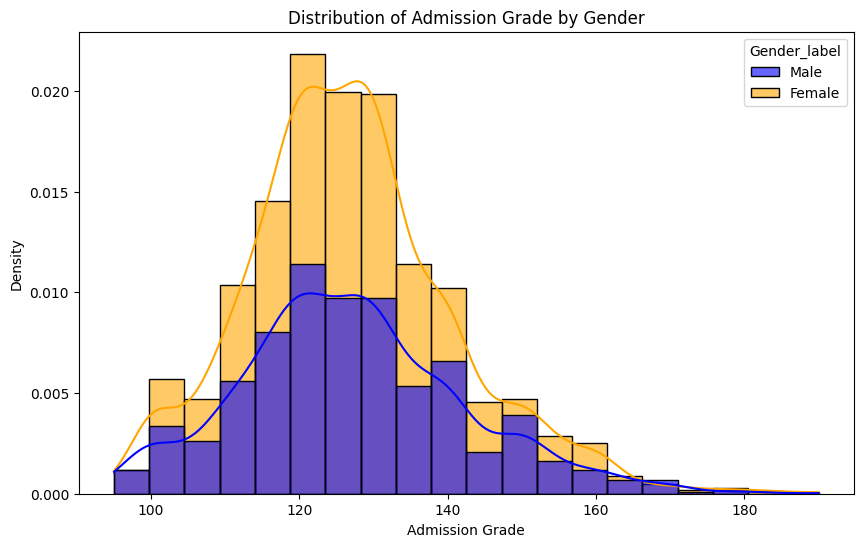

In [55]:
df["Gender_label"] = df["Gender"].map({0: "Female", 1: "Male"})

plt.figure(figsize=(10, 6))
sns.histplot(
    data=df,
    x="Admission grade",
    hue="Gender_label",
    bins=20,
    kde=True,
    palette=["blue", "orange"],
    alpha=0.6,
    stat="density",
)
plt.title("Distribution of Admission Grade by Gender")
plt.xlabel("Admission Grade")
plt.ylabel("Density")
plt.show()


wowza! kết quả cho thấy có sự chênh lệch rõ ràng giữa hai giới tính

#### Kiểm định khác biệt độ tuồi giữa các nhóm target bằng anova ###

anova cần mấy biến tuân theo phân phối chuẩn, nên t đi check coi chuẩn ko

In [33]:
from scipy.stats import shapiro
from scipy.stats import levene

groups = df.groupby("Target")["Age at enrollment"]

for name, group_data in groups:
    stat, p = shapiro(group_data.dropna())  # drop NA values
    print(f"{name}: W={stat:.3f}, p={p:.3f}")

groups = [group.dropna() for name, group in df.groupby("Target")["Age at enrollment"]]

stat, p = levene(*groups)
print(f"Levene’s test: W={stat:.3f}, p={p:.3f}")

Dropout: W=0.840, p=0.000
Enrolled: W=0.685, p=0.000
Graduate: W=0.592, p=0.000
Levene’s test: W=117.322, p=0.000


⚠️ This violates the normality assumption for ANOVA.

⚠️ This violates the homogeneity of variance assumption for ANOVA.

Since both normality and equal variance assumptions are violated, one-way ANOVA is NOT appropriate here.

✅ Correct approach:
Use a non-parametric alternative like Kruskal-Wallis test, which does not assume normality or equal variances.

In [34]:
from scipy.stats import kruskal

dropout_age = df[df["Target"] == "Dropout"]["Age at enrollment"]
enrolled_age = df[df["Target"] == "Enrolled"]["Age at enrollment"]
graduate_age = df[df["Target"] == "Graduate"]["Age at enrollment"]

stat, p = kruskal(dropout_age, enrolled_age, graduate_age)
print(f"Kruskal-Wallis test: H={stat:.3f}, p={p:.3e}")

Kruskal-Wallis test: H=375.107, p=3.520e-82


Since p << 0.05, you reject the null hypothesis. This means there is a statistically significant difference between at least one pair of your groups.

Minh họa

C:\Users\hjiis\AppData\Local\Temp\ipykernel_18748\1909950318.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Target", y="Age at enrollment", data=plot_df, palette="Set3")


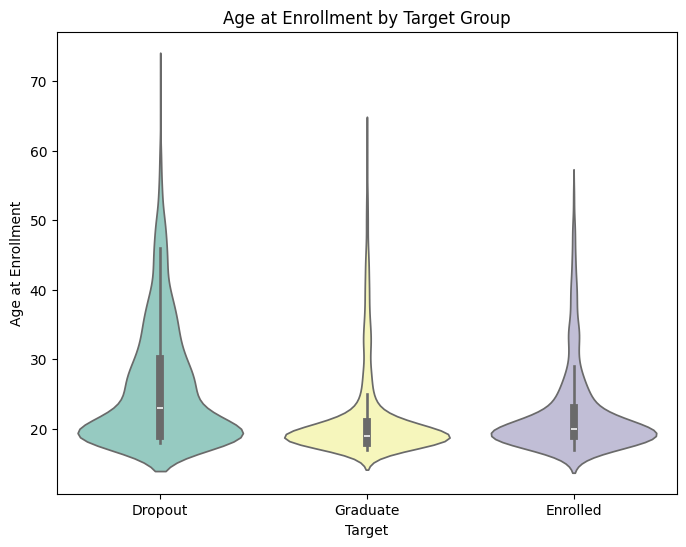

In [35]:
# Create a DataFrame for plotting
plot_df = df[["Target", "Age at enrollment"]].dropna()

plt.figure(figsize=(8, 6))
sns.violinplot(x="Target", y="Age at enrollment", data=plot_df, palette="Set3")
plt.title("Age at Enrollment by Target Group")
plt.ylabel("Age at Enrollment")
plt.xlabel("Target")
plt.show()

Kết luận: Dữ liệu cho thấy mối quan hệ nghịch đảo giữa độ tuổi nhập học và khả năng tốt nghiệp. Về mặt thống kê, những sinh viên nhập học ở độ tuổi truyền thống sớm hơn có khả năng hoàn thành chương trình học cao hơn nhiều so với những sinh viên nhập học muộn hơn.

## 4. Phân tích tương quan giữa các biến

### a. Tìm hiểu và trình bày hệ số tương quan Pearson và Spearman.

Pearson correlation coefficient (PCC) is a correlation coefficient that measures linear correlation between two sets of data. It is the ratio between the covariance of two variables and the product of their standard deviations; thus, it is essentially a normalized measurement of the covariance, such that the result always has a value between −1 and 1. As a simple example, one would expect the age and height of a sample of children from a school to have a Pearson correlation coefficient significantly greater than 0, but less than 1 (as 1 would represent an unrealistically perfect correlation). 

Spearman's rank correlation coefficient or Spearman's ρ is a number ranging from -1 to 1 that indicates how strongly two sets of ranks are correlated. It could be used in a situation where one only has ranked data, such as a tally of gold, silver, and bronze medals. If a statistician wanted to know whether people who are high ranking in sprinting are also high ranking in long-distance running, they would use a Spearman rank correlation coefficient.It assesses how well the relationship between two variables can be described using a monotonic function.

The Spearman correlation between two variables is equal to the Pearson correlation between the rank values of those two variables; while Pearson's correlation assesses linear relationships, Spearman's correlation assesses monotonic relationships (whether linear or not). If there are no repeated data values, a perfect Spearman correlation of +1 or −1 occurs when each of the variables is a perfect monotone function of the other. 

#### b. Áp dụng tính hệ số tương quan Pearson và Spearman giữa các biến số trong bộ dữ liệu đã chọn.

In [36]:
corr_pearson = df[quantiative_columns].corr(method="pearson")
corr_spearman = df[quantiative_columns].corr(method="spearman")

#### c. Sử dụng biểu đồ phù hợp để trực quan hóa mối quan hệ giữa các biến. (Heatmap)

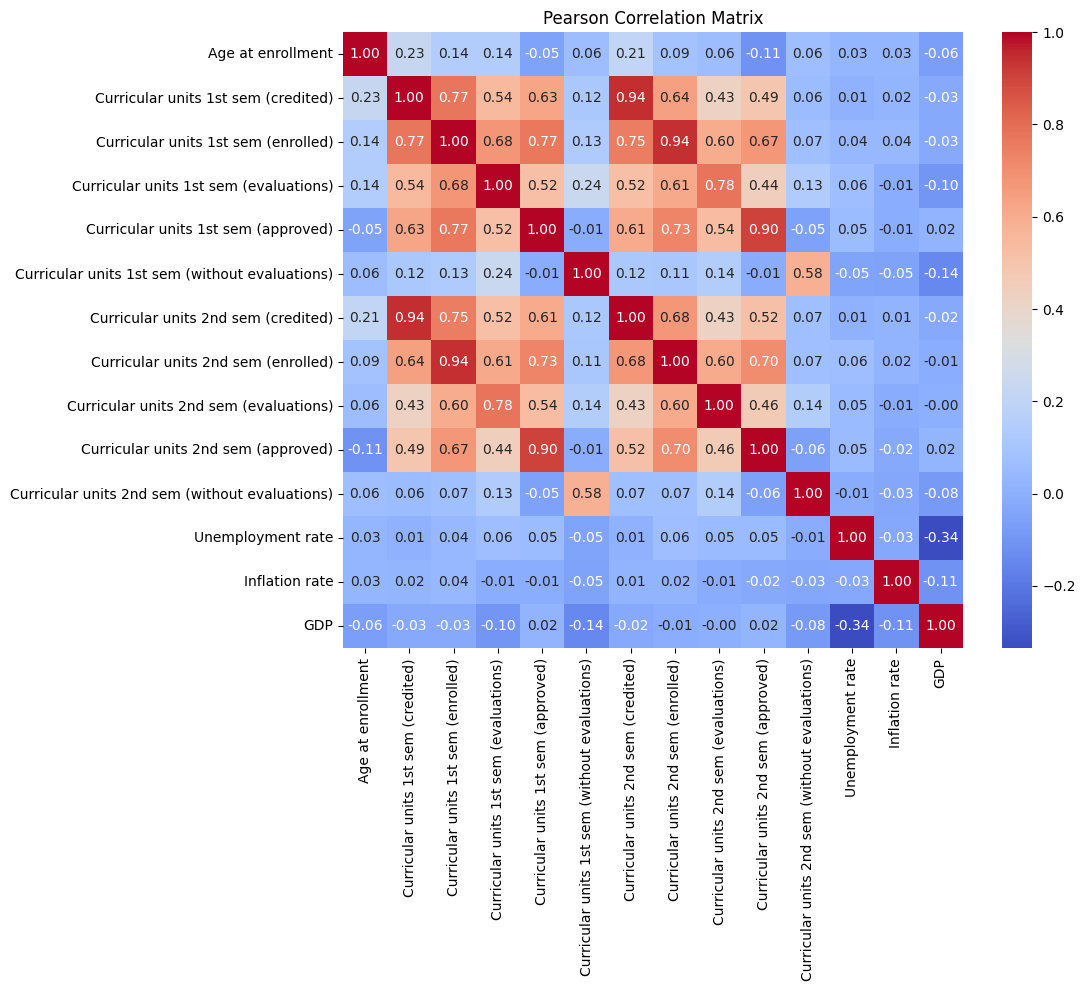

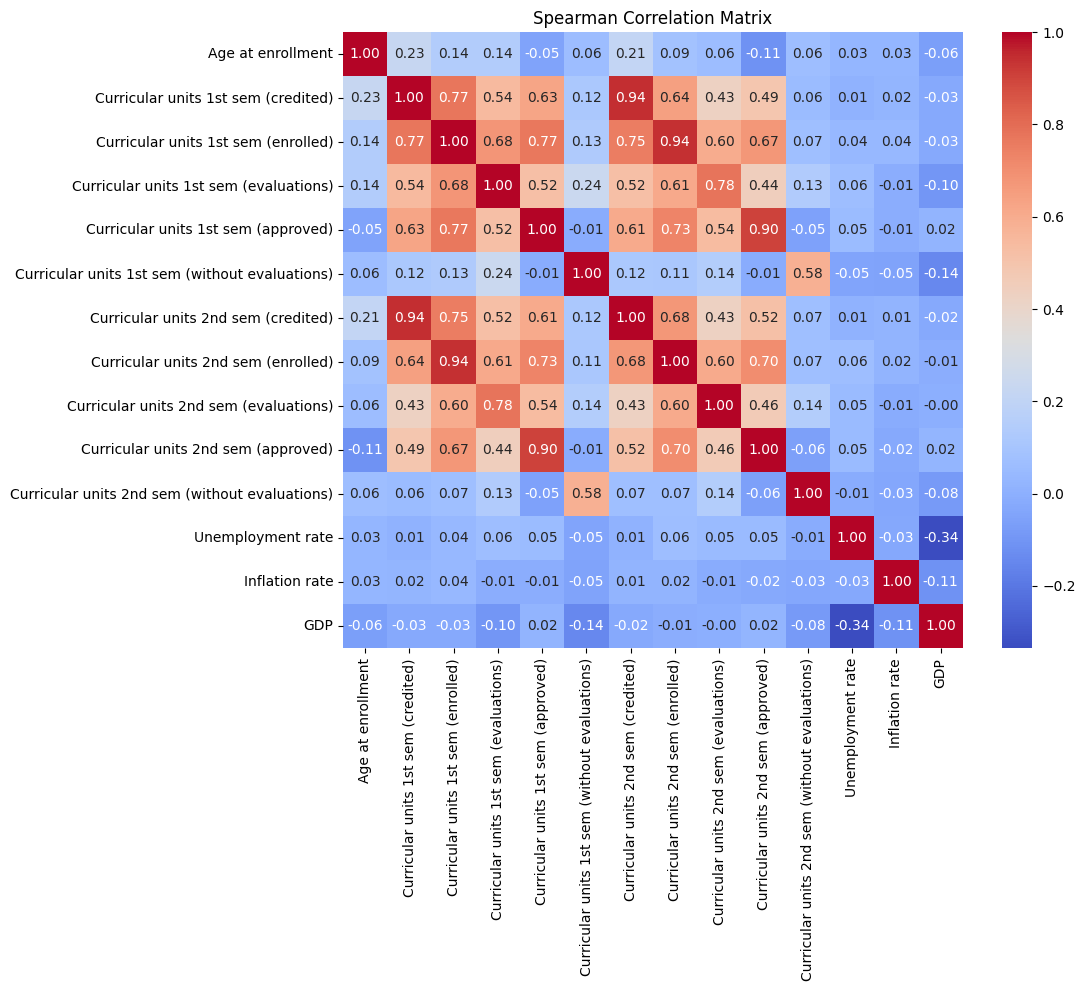

In [37]:
# Heatmap for Pearson
plt.figure(figsize=(10, 8))
sns.heatmap(corr_pearson, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Pearson Correlation Matrix")
plt.show()

# Heatmap for Spearman
plt.figure(figsize=(10, 8))
sns.heatmap(corr_spearman, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Spearman Correlation Matrix")
plt.show()

#### d. Đưa ra nhận xét về ý nghĩa thực tiễn của các mối tương quan.

- **Tính kế thừa và dự báo mạnh mẽ (Quan trọng nhất):** Tương quan giữa Học kỳ 1 và Học kỳ 2 là rất cao (màu đỏ đậm, hệ số > 0.9). Kết quả học tập kỳ đầu là chỉ báo dự báo chính xác nhất cho kỳ sau. Sinh viên có xu hướng duy trì phong độ ổn định; ai học tốt kỳ 1 thường sẽ học tốt kỳ 2 và ngược lại. Nhà trường có thể dùng kết quả kỳ 1 để sớm phát hiện sinh viên cần hỗ trợ.
- **Mối quan hệ giữa Nỗ lực và Kết quả:** Có sự tương quan thuận chặt chẽ giữa số môn đăng ký/tham gia đánh giá (enrolled/evaluations) và số môn đạt (approved/credited). Mức độ tích cực tham gia học tập và thi cử quyết định lớn đến kết quả đầu ra. Tuy nhiên, hệ số không phải tuyệt đối (1.0), cho thấy việc "chăm đi thi" là điều kiện cần nhưng chưa đủ, vẫn tồn tại tỷ lệ rớt môn nhất định.
- **Yếu tố Kinh tế vĩ mô không tác động trực tiếp:** Các chỉ số GDP, Lạm phát, Thất nghiệp có hệ số tương quan gần bằng 0 (màu xanh nhạt/trắng) với các biến kết quả học tập.Trong phạm vi dữ liệu này, bối cảnh kinh tế bên ngoài không ảnh hưởng đáng kể đến thành tích học tập của cá nhân sinh viên. Việc học kém hay giỏi phụ thuộc vào yếu tố nội tại hơn là môi trường kinh tế vĩ mô.
- **Tuổi tác không phải là rào cản:** Biến "Age at enrollment" có tương quan rất thấp với các kết quả học tập. Độ tuổi nhập học (già hay trẻ) không quyết định thành công hay thất bại trong môi trường đại học.

***Tóm lại:*** Để cải thiện chất lượng đào tạo, nên tập trung giám sát kết quả ngay từ Học kỳ 1 và khuyến khích sinh viên tham gia đầy đủ các bài đánh giá, thay vì lo ngại về các yếu tố nhân khẩu học (tuổi) hay kinh tế bên ngoài.

## 5. Hồi quy đa biến (Multiple Linear Regression)

### a. Tìm hiểu và trình bày lý thuyết về Hồi quy đa biến.

Hồi quy đa biến là một kĩ thuật thống kê sử dụng nhiều biến độc lập (các thuộc tính) để dự đoán kết quả của một biến phụ thuốc, các biến độc lập này lý tưởng sẽ có ý nghĩa để giải thích sẽ mô hình huấn luyện này. Mục đích của hồi quy đa biến là mô hình hóa mối tương quan tuyến tính giữa các biến độc lập với biến phụ thuộc. Về cơ bản, hồi quy đa biến là một hồi quy tuyến tính vì nó bao gồm nhiều hơn một biến độc lập.

### b. Xây dựng và đánh giá mô hình hồi quy tuyến tính đa biến nhằm dự đoán một biến phụ thuộc (biến mục tiêu) dựa trên nhiều biến độc lập trong bộ dữ liệu đã chọn.

Ở đây ta định nghĩa rằng biến phụ thuộc là Curricular units 2nd sem (grade) (điểm bình quân học kỳ 2 từ 0 tới 20) và các biến còn lại là biến phụ thuộc để minh họa cho hồi quy đa biến do Target của tập dữ liệu là biến định tính (nghỉ học, đang học, tốt nghiệp).

Chúng tôi đã chủ động tránh việc áp dụng One-Hot Encoding toàn phần cho các đặc trưng có tính đa dạng cao (high-cardinality) – như Nghề nghiệp và Khóa học – để ngăn chặn 'Lời nguyền của số chiều' (The Curse of Dimensionality).

Rất nhiều giá trị phân loại trong số này có độ hỗ trợ (Support) thấp (chiếm dưới 1% tập dữ liệu), tạo ra các 'Đặc trưng thưa' (Sparse Features) dẫn đến việc mô hình mất ổn định và bị quá khớp (overfitting).

Thay vào đó, chúng tôi ưu tiên các đặc trưng có độ hỗ trợ cao, bao quát được toàn bộ tổng thể. Điều này đảm bảo mô hình sẽ học được các quy luật hành vi tổng quát thay vì chỉ 'học vẹt' (ghi nhớ) các nhóm nhỏ lẻ.

Support là tỉ lệ giữa độ tần suất của một biến với cả tập dữ liệu. Nó được sử dụng để tìm một tập các biến xuất hiện có thường xuyên hay không trong tập dữ liệu. Công thức:
$$ \text{Support}(X) = \frac{\text{Number of transactions containing itemset X}}{\text{Total number of transactions}} $$
Sau đây chúng tôi sẽ thử nghiệm và áp dụng công thức này lên tất cả các cột trong tập dữ liệu để xét xem thử mức độ thưa thớt của các cột trên tập dữ liệu 

--- FULL DATASET AUDIT (18 Columns Scanned) ---
                       Feature  Total Cats  Rare Cats (<1%)  Sparsity Rate (%)
5                  Nacionality          21               20               95.2
7       Father's qualification          34               27               79.4
9          Father's occupation          46               34               73.9
6       Mother's qualification          29               21               72.4
4       Previous qualification          17               12               70.6
8          Mother's occupation          32               22               68.8
1             Application mode          18                9               50.0
0               Marital status           6                3               50.0
2                       Course          17                1                5.9
3   Daytime/evening attendance           2                0                0.0
10                   Displaced           2                0                0.0
11  

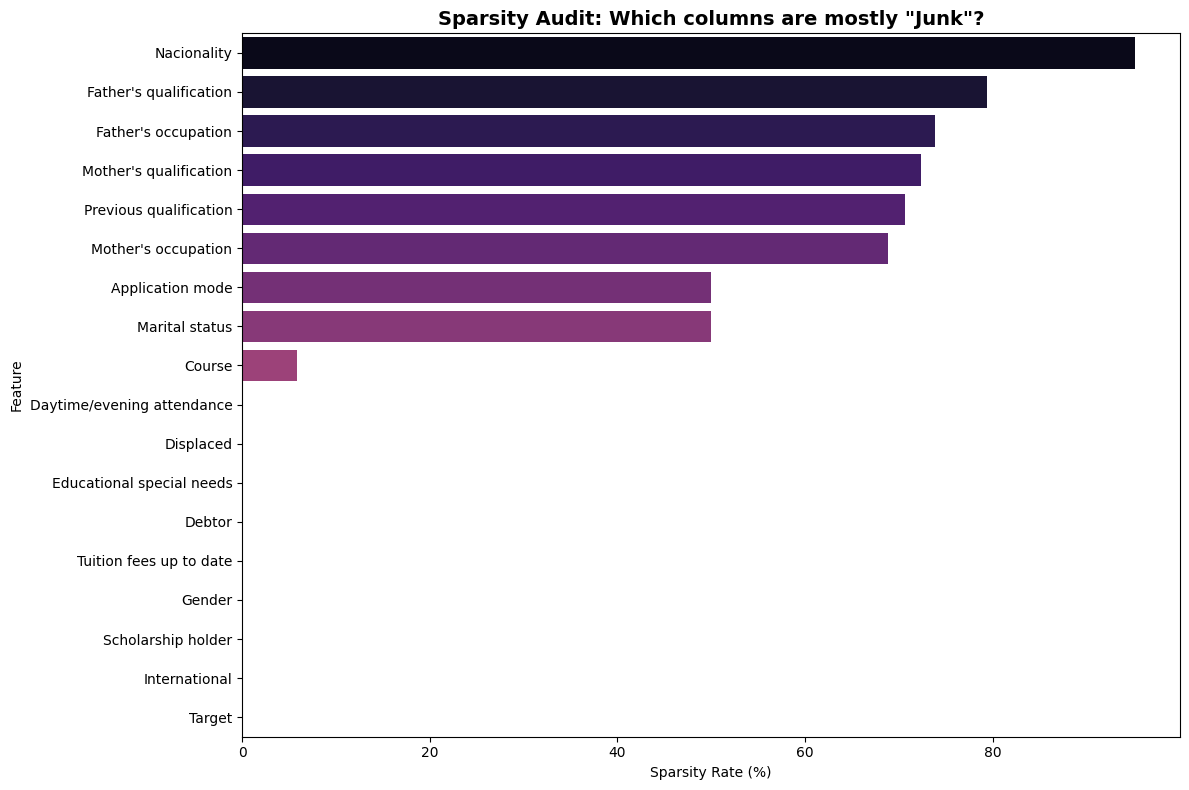

In [38]:
# 1. Define the Continuous Columns
continuous_cols = [
    "Curricular units 1st sem (grade)",
    "Curricular units 2nd sem (grade)",
    "Curricular units 1st sem (enrolled)",
    "Curricular units 2nd sem (enrolled)",
    "Curricular units 1st sem (evaluations)",
    "Curricular units 2nd sem (evaluations)",
    "Curricular units 1st sem (approved)",
    "Curricular units 2nd sem (approved)",
    "Curricular units 1st sem (credited)",
    "Curricular units 2nd sem (credited)",
    "Curricular units 1st sem (without evaluations)",
    "Curricular units 2nd sem (without evaluations)",
    "Age at enrollment",
    "Unemployment rate",
    "Inflation rate",
    "GDP",
    "Application order",
    "Previous qualification (grade)",
    "Admission grade",
]

# 2. Dynamically identify ALL other columns (The "Hidden" Categories)
df.columns = df.columns.str.strip()
categorical_candidates = [col for col in df.columns if col not in continuous_cols]

# 3. Run the Audit
audit_data = []

for col in categorical_candidates:
    # Get the distribution percentages
    counts = df[col].value_counts(normalize=True) * 100

    total_categories = len(counts)
    rare_categories = len(counts[counts < 1.0])

    if total_categories > 0:
        sparsity_rate = (rare_categories / total_categories) * 100  # Support value
    else:
        sparsity_rate = 0

    audit_data.append(
        {
            "Feature": col,
            "Total Cats": total_categories,
            "Rare Cats (<1%)": rare_categories,
            "Sparsity Rate (%)": round(sparsity_rate, 1),
        }
    )

# 4. Sort and Display
audit_df = pd.DataFrame(audit_data).sort_values(by="Sparsity Rate (%)", ascending=False)

# FIX: Explicitly remove any lingering tabs in the Feature column before plotting
audit_df["Feature"] = audit_df["Feature"].astype(str).str.replace("\t", "", regex=False)

print(f"--- FULL DATASET AUDIT ({len(categorical_candidates)} Columns Scanned) ---")
print(audit_df)

# 5. Visualization
plt.figure(figsize=(12, 8))

sns.barplot(
    x="Sparsity Rate (%)",
    y="Feature",
    data=audit_df,
    palette="magma",
    hue="Feature",
    legend=False,
)

plt.title(
    'Sparsity Audit: Which columns are mostly "Junk"?', fontsize=14, fontweight="bold"
)

# FIX: Removed plt.legend() because it was empty and causing a warning
plt.tight_layout()
plt.show()

- **Lý do ưu tiên các Đặc trưng có "Độ thưa thấp" (0%)**
    - Quá trình kiểm tra cho thấy các đặc trưng có số lượng phân loại lớn (high-cardinality) như Nationality (Quốc tịch) và Occupation (Nghề nghiệp) bị thưa thớt nghiêm trọng, trong đó hơn 80% các danh mục xuất hiện trong dưới 1% tập dữ liệu. Việc đưa các đặc trưng này vào sẽ tạo ra hai vấn đề nghiêm trọng:
    - Quá khớp (Overfitting): Mô hình sẽ "ghi nhớ" các danh mục hiếm (ví dụ: một công việc cụ thể chỉ có 3 sinh viên làm) thay vì học các mẫu tổng quát hóa.
    - Không ổn định (Instability): Các hệ số được suy ra từ các mẫu có kích thước quá nhỏ sẽ không đáng tin cậy về mặt thống kê.

Vì tập dữ liệu này đã lớn sẵn và khi được phân rã các biến định tính bằng one hot encoding sẽ làm cho tập dữ liệu càng rối thêm. Để làm cho mô hình đơn giản, dễ hiểu và không quá dài dòng thì chúng tôi giới hạn danh sách ứng viên vào các đặc trưng có độ thưa 0% (Độ hỗ trợ cao/High Support), chúng tôi đảm bảo rằng mọi biến đều áp dụng cho một phần lớn của tập hợp sinh viên. Điều này đảm bảo mô hình học được các mẫu hành vi toàn cục thay vì nhiễu cục bộ.

- **Loại trừ Biến "Target" (Rò rỉ dữ liệu)**: Mặc dù biến Target (Tốt nghiệp/Bỏ học) xuất hiện trong danh sách Độ thưa 0%, nó bị loại trừ khỏi danh sách ứng viên do vấn đề Rò rỉ dữ liệu (Data Leakage). Target đại diện cho kết quả cuối cùng của văn bằng (thông tin tương lai). Trong kịch bản dự đoán thực tế (ví dụ: dự đoán điểm số khi bắt đầu Học kỳ 2), chúng ta không thể biết liệu sinh viên đó có tốt nghiệp nhiều năm sau hay không. Việc sử dụng Target để dự đoán Điểm học kỳ 2 sẽ thổi phồng độ chính xác một cách nhân tạo bằng thông tin không có sẵn tại thời điểm dự đoán.

- **Về GDP**: Chúng tôi giữ lại GDP (và các chỉ số kinh tế liên quan) làm ứng viên. Khác với Target, các giá trị này thường được ghi nhận tại thời điểm nhập học hoặc là các trung bình kinh tế vĩ mô hàng năm đã biết trong suốt học kỳ. Chúng cung cấp bối cảnh môi trường hợp lệ mà không vi phạm logic thời gian.

- **Danh sách Ứng viên Sơ bộ (Trước khi Kiểm định Thống kê)**: Dựa trên tiêu chí Độ thưa 0%, chúng tôi giữ lại toàn bộ danh sách các biến an toàn (High Support) dưới đây để tiến hành các bước kiểm định tiếp theo:
    - Nhóm Tài chính: Tuition fees up to date, Debtor, Scholarship holder.
    - Nhóm Nhân khẩu học: Age at enrollment, Gender, Displaced, International.
    - Nhóm Hành vi/Khác: Daytime/evening attendance, Educational special needs.
    - Nhóm Kinh tế/Học thuật: GDP, Curricular units 1st sem (grade).

- **Kế hoạch Kiểm định Thống kê (Validation Plan)**: Để gạn lọc danh sách sơ bộ này, chúng tôi sẽ áp dụng hai bước kiểm tra thống kê cho tất cả các ứng viên trong danh sách trên:
    - Bước 1: Kiểm tra VIF để Phát hiện các biến bị dư thừa (Multicollinearity). Chúng tôi sẽ kiểm tra ván đề đa cộng tuyến của các ứng cử viên (biến có thể sẽ được chọn chính thức và được sử dụng trong mô hình ols sau này) này và loại bỏ (nếu có) các thuộc với giá trị VIF cao (lớn hơn 5).
    - Bước 2: Chạy mô hình OLS với tất cả ứng viên còn lại. Nếu một biến có P-value > 0.05, nó chứng tỏ biến đó không đóng góp thông tin giá trị khi đã có các biến khác, và sẽ bị loại bỏ.

Phát hiện đa cộng tuyến trước khi áp dụng các biến vào mô hình hồi quy và loại bỏ các ứng cử viên được xem là không quan trọng về mặt thống kê

Vì trong các biến có giá tị liên tục, có một vài là rò rỉ dữ liệu, các cột liên quan tới học kỳ hai:   
- **"Curricular units 2nd sem (enrolled)"**: Giữ cột này vì đây là thông tin có thể biết được khi dự đoán, đây là số môn mà học sinh đã tham gia trong học kỳ hai.
- **"Curricular units 2nd sem (evaluations)"**: Bỏ cột này vì đây là số lần thi (kể cả thi lại) mà học sinh đã tham gia sau học kì hai, giá trị này không thể biết được trước khi thi học kỳ hai.
- **"Curricular units 2nd sem (without evaluations)"**: Cũng như cột ngay bên trên, bỏ cột này vì đây là số lần thi mà học sinh đã không tham gia sau học kì hai vì lý do nào đó (ví dụ: lý do cá nhân bệnh, sốt, quên, hay là không đủ điều kiện dự thi), giá trị này không thể biết được trước khi thi học kỳ hai.
- **"Curricular units 2nd sem (approved)"**: Đây cũng là cột dữ liệu rò rỉ, tổng số môn học đậu (kể cả miễn hay là phải thi) của sinh viên là không thể nào biết được trước khi học kỳ hai kết thúc.
- **"Curricular units 2nd sem (credited)"**: Giữ cột này do đây là số môn mà học sinh được miễn khi học kỳ hai mới bắt đầu.
Và "Curricular units 2nd sem (grade)" là biến phụ thuộc chúng tôi sẽ dự đoán nên sẽ được loại bỏ

Vì các biến được chọn làm ứng cử viên đều là biến nhị phân (Binary Variables), chỉ có 2 giá trị (0 và 1). Với biến 0/1, hồi quy hiểu đơn giản là "tắt" hoặc "bật". Hiệu ứng của nó chỉ là cộng hoặc trừ một hằng số vào kết quả. Label Encoding được áp dụng sẵn trên tập dữ liệu là hoàn toàn ổn.

In [39]:
# Step 1
# We will check vif to avoid multicolinearity
# 1. Define list of 0% sparsity features
redundancy_columns_check = [
    "Daytime/evening attendance",
    "Displaced",
    "Educational special needs",
    "Debtor",
    "Tuition fees up to date",
    "Gender",
    "Scholarship holder",
    "International",
]

redundancy_df_check = df[redundancy_columns_check + continuous_cols]

redundancy_df_check.drop(
    [
        "Curricular units 2nd sem (grade)",
        "Curricular units 2nd sem (evaluations)",
        "Curricular units 2nd sem (without evaluations)",
        "Curricular units 2nd sem (approved)",
    ],
    axis=1,
    inplace=True,
)
# 2. Add a constant (intercept) for the VIF calculation
# (statsmodels OLS requires an intercept to calculate VIF correctly)
X_vif = redundancy_df_check.assign(const=1)

# 3. Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X_vif.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))
]

# 4. Sort and Display
print(vif_data.sort_values(by="VIF", ascending=False))

                                           Feature         VIF
23                                           const  220.246898
9              Curricular units 1st sem (enrolled)   21.591638
13             Curricular units 1st sem (credited)   15.174282
10             Curricular units 2nd sem (enrolled)   13.914353
14             Curricular units 2nd sem (credited)   11.826420
12             Curricular units 1st sem (approved)    6.887849
8                 Curricular units 1st sem (grade)    3.516564
11          Curricular units 1st sem (evaluations)    2.483009
16                               Age at enrollment    1.602612
22                                 Admission grade    1.577291
21                  Previous qualification (grade)    1.558393
0                       Daytime/evening attendance    1.336497
4                          Tuition fees up to date    1.324455
1                                        Displaced    1.289183
3                                           Debtor    1

C:\Users\hjiis\AppData\Local\Temp\ipykernel_18748\4247556854.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  redundancy_df_check.drop(


Ở bước tiếp theo, chúng tôi sẽ tạo một hàm để xóa bỏ một biến với giá vif cao nhất lớn hơn 5 cho tới khi không còn biến nào lớn hơn 5

In [40]:
def remove_high_vif_features(df, threshold=5.0):
    """
    Iteratively removes features with a VIF greater than the threshold
    and prints the final VIF table.
    """
    # Create a copy and ensure numeric data only
    df_output = df.copy()
    df_output = df_output.select_dtypes(include=[np.number]).dropna()

    while True:
        # Add constant
        df_with_const = add_constant(df_output)
        # Calculate VIF for current features
        vif_data = pd.DataFrame()
        vif_data["feature"] = df_with_const.columns
        vif_data["VIF"] = [
            variance_inflation_factor(df_with_const.values, i)
            for i in range(df_with_const.shape[1])
        ]

        # Filter out the 'const' row so we don't try to drop it
        vif_data = vif_data[vif_data["feature"] != "const"]

        # Get the feature with the maximum VIF
        max_vif = vif_data["VIF"].max()

        # Check against threshold
        if max_vif > threshold:
            # Identify feature to drop
            max_feature = vif_data.sort_values("VIF", ascending=False).iloc[0][
                "feature"
            ]
            print(f"Dropping '{max_feature}' (VIF: {max_vif:.2f})")
            df_output = df_output.drop(columns=[max_feature])
        else:
            # df_output[]
            # STOP CONDITION MET: Print the final table
            print("\nFinal VIF Values:")
            print("-----------------")
            print(vif_data.sort_values("VIF", ascending=False))
            break

    return df_output


df_cleaned = remove_high_vif_features(redundancy_df_check)

Dropping 'Curricular units 1st sem (enrolled)' (VIF: 21.59)
Dropping 'Curricular units 1st sem (credited)' (VIF: 11.38)
Dropping 'Curricular units 1st sem (approved)' (VIF: 5.54)

Final VIF Values:
-----------------
                                           feature       VIF
10             Curricular units 2nd sem (enrolled)  2.695946
12             Curricular units 2nd sem (credited)  2.253037
11          Curricular units 1st sem (evaluations)  2.107141
9                 Curricular units 1st sem (grade)  1.672074
14                               Age at enrollment  1.580215
20                                 Admission grade  1.574677
19                  Previous qualification (grade)  1.555455
1                       Daytime/evening attendance  1.335410
5                          Tuition fees up to date  1.301706
2                                        Displaced  1.282648
4                                           Debtor  1.232530
17                                             GDP  

Sau khi loại bỏ biến cho tới khi không còn giá trị vif lớn hơn 5, kết quả cho thấy tất cả thuộc tính đều có giá trị vif rất thấp nên tạm thời có thể đưa vô mô hình ols một cách an toàn. Sau đó chúng tôi sẽ huấn luyện mô hình bằng các ứng cử viên này, dựa vào kết quả mô hình, chúng tôi tập trung vào giá trị P|t| để xác định nếu các biến có thực sự mang ý nghĩa thống kê hay không và các biến với giá trị ấy lớn hơn 0.05 thì sẽ được loại bỏ, các biến còn lại sau bước tiếp theo chính là biến được sử dụng trong mô hình ols, nó sẽ thực sự có ý nghĩa thống kê và dự đoán và chúng tôi có thể giải thích được mô hình ấy, đây là một kĩ thuật gọi là Backward Elimination.

In [41]:
# Step 2
# We create a model with all these candidates
X_challenger = sm.add_constant(df_cleaned)
y = df["Curricular units 2nd sem (grade)"]

model_challenger = sm.OLS(y, X_challenger).fit()

print("--- EVIDENCE B: The 'Challenger' Model Results ---")
print(model_challenger.summary())

--- EVIDENCE B: The 'Challenger' Model Results ---
                                   OLS Regression Results                                   
Dep. Variable:     Curricular units 2nd sem (grade)   R-squared:                       0.718
Model:                                          OLS   Adj. R-squared:                  0.717
Method:                               Least Squares   F-statistic:                     560.9
Date:                              Sun, 30 Nov 2025   Prob (F-statistic):               0.00
Time:                                      12:34:19   Log-Likelihood:                -10779.
No. Observations:                              4424   AIC:                         2.160e+04
Df Residuals:                                  4403   BIC:                         2.173e+04
Df Model:                                        20                                         
Covariance Type:                          nonrobust                                         
                   

Chúng tôi sẽ tập trung vào cột P>|t|, nếu giá trị hơn 0.05 thì biến sẽ không đáng kể về mặt thống kê và sẽ được loại bỏ ra khỏi mô hình hồi quy đa biến OLS.

<table>
<tr><th>Variable</th><th>coef</th><th>std err</th><th>t</th><th>P>|t|</th><th>[0.025</th><th>0.975]</th></tr>
<tr><td>const</td><td>0.4475</td><td>0.610</td><td>0.733</td><td>0.464</td><td>-0.749</td><td>1.644</td></tr>
<tr><td>Daytime/evening attendance</td><td>-0.4126</td><td>0.154</td><td>-2.671</td><td>0.008</td><td>-0.715</td><td>-0.110</td></tr>
<tr><td>Displaced</td><td>-0.0273</td><td>0.095</td><td>-0.288</td><td>0.774</td><td>-0.213</td><td>0.159</td></tr>
<tr><td>Educational special needs</td><td>-0.1645</td><td>0.392</td><td>-0.420</td><td>0.675</td><td>-0.933</td><td>0.604</td></tr>
<tr><td>Debtor</td><td>-0.3410</td><td>0.146</td><td>-2.339</td><td>0.019</td><td>-0.627</td><td>-0.055</td></tr>
<tr><td>Tuition fees up to date</td><td>1.2097</td><td>0.147</td><td>8.246</td><td>0.000</td><td>0.922</td><td>1.497</td></tr>
<tr><td>Gender</td><td>-0.2665</td><td>0.092</td><td>-2.898</td><td>0.004</td><td>-0.447</td><td>-0.086</td></tr>
<tr><td>Scholarship holder</td><td>0.3214</td><td>0.101</td><td>3.170</td><td>0.002</td><td>0.123</td><td>0.520</td></tr>
<tr><td>International</td><td>0.0638</td><td>0.270</td><td>0.236</td><td>0.813</td><td>-0.465</td><td>0.593</td></tr>
<tr><td>Curricular units 1st sem (grade)</td><td>0.8266</td><td>0.011</td><td>74.270</td><td>0.000</td><td>0.805</td><td>0.848</td></tr>
<tr><td>Curricular units 2nd sem (enrolled)</td><td>0.2051</td><td>0.031</td><td>6.578</td><td>0.000</td><td>0.144</td><td>0.266</td></tr>
<tr><td>Curricular units 1st sem (evaluations)</td><td>-0.0110</td><td>0.014</td><td>-0.757</td><td>0.449</td><td>-0.039</td><td>0.017</td></tr>
<tr><td>Curricular units 2nd sem (credited)</td><td>-0.0114</td><td>0.033</td><td>-0.351</td><td>0.726</td><td>-0.075</td><td>0.053</td></tr>
<tr><td>Curricular units 1st sem (without evaluations)</td><td>-0.0191</td><td>0.065</td><td>-0.294</td><td>0.768</td><td>-0.146</td><td>0.108</td></tr>
<tr><td>Age at enrollment</td><td>-0.0335</td><td>0.007</td><td>-4.852</td><td>0.000</td><td>-0.047</td><td>-0.020</td></tr>
<tr><td>Unemployment rate</td><td>-0.0154</td><td>0.017</td><td>-0.898</td><td>0.369</td><td>-0.049</td><td>0.018</td></tr>
<tr><td>Inflation rate</td><td>-0.0360</td><td>0.031</td><td>-1.176</td><td>0.240</td><td>-0.096</td><td>0.024</td></tr>
<tr><td>GDP</td><td>0.0526</td><td>0.020</td><td>2.589</td><td>0.010</td><td>0.013</td><td>0.092</td></tr>
<tr><td>Application order</td><td>-0.0464</td><td>0.035</td><td>-1.321</td><td>0.187</td><td>-0.115</td><td>0.022</td></tr>
<tr><td>Previous qualification (grade)</td><td>-0.0059</td><td>0.004</td><td>-1.498</td><td>0.134</td><td>-0.014</td><td>0.002</td></tr>
<tr><td>Admission grade</td><td>0.0082</td><td>0.004</td><td>2.277</td><td>0.023</td><td>0.001</td><td>0.015</td></tr>
</table>

Candidates for Removal (The "Cleanup List"):

Displaced (0.774) → Drop.

Educational special needs (0.675) → Drop.

International (0.813) → Drop.

Curricular units 1st sem (evaluations) (0.449) → Drop.

Curricular units 2nd sem (credited) (0.726) → Drop.

Curricular units 1st sem (without evaluations) (0.768) → Drop.

Unemployment rate (0.369) → Drop.

Inflation rate (0.240) → Drop.

Application order (0.187) → Drop.

Previous qualification (grade) (0.134) → Drop.

Sau đó chúng tôi sẽ huấn luyện lại mô hình với các biến có ý nghĩa thống kê

In [42]:
# 1. The Evidence-Based Feature List
# - Low Sparsity (Stable)
# - No Leakage (Realistic)
# - Statistically Significant (Useful)
df_cleaned.drop(
    [
        "Displaced",
        "Educational special needs",
        "International",
        "Curricular units 1st sem (evaluations)",
        "Curricular units 2nd sem (credited)",
        "Curricular units 1st sem (without evaluations)",
        "Unemployment rate",
        "Inflation rate",
        "Application order",
        "Previous qualification (grade)",
        # "Admission grade"
    ],
    axis=1,
    inplace=True,
)

# X_vif = df_cleaned.assign(const=1)

# # Calculate VIF
# vif_data = pd.DataFrame()
# vif_data["Feature"] = X_vif.columns
# vif_data["VIF"] = [
#     variance_inflation_factor(X_vif.values, i) for i in range(len(X_vif.columns))
# ]


# # Sort and Display
# print(vif_data.sort_values(by="VIF", ascending=False))

# 2. Prepare Data
X_final = df_cleaned.copy()
X_final = sm.add_constant(X_final)
y = df["Curricular units 2nd sem (grade)"]

# 3. Run OLS
model_final = sm.OLS(y, X_final).fit()

# 4. Show the World
print(model_final.summary())

                                   OLS Regression Results                                   
Dep. Variable:     Curricular units 2nd sem (grade)   R-squared:                       0.718
Model:                                          OLS   Adj. R-squared:                  0.717
Method:                               Least Squares   F-statistic:                     1122.
Date:                              Sun, 30 Nov 2025   Prob (F-statistic):               0.00
Time:                                      12:34:19   Log-Likelihood:                -10782.
No. Observations:                              4424   AIC:                         2.159e+04
Df Residuals:                                  4413   BIC:                         2.166e+04
Df Model:                                        10                                         
Covariance Type:                          nonrobust                                         
                                          coef    std err          t  

Sau bước này lại phát hiện thêm một biến có giá trị P|t| cao Admission grade 0.052, và với lý do nào đó mô hình bị dính vấn đề đa cộng tuyến, ở bước tiếp theo chúng tôi lại tiếp tục sử dụng kỹ thuật Backward Elimination, xóa cột Admission grade khỏi mô hình và huấn luyện lại thêm một lần nữa.

In [43]:
df_cleaned.drop("Admission grade", axis=1, inplace=True)

# 2. Prepare Data
X_final = df_cleaned.copy()
X_final = sm.add_constant(X_final)
y = df["Curricular units 2nd sem (grade)"]

# 3. Run OLS
model_final = sm.OLS(y, X_final).fit()

# 4. Show the World
print(model_final.summary())

                                   OLS Regression Results                                   
Dep. Variable:     Curricular units 2nd sem (grade)   R-squared:                       0.717
Model:                                          OLS   Adj. R-squared:                  0.717
Method:                               Least Squares   F-statistic:                     1245.
Date:                              Sun, 30 Nov 2025   Prob (F-statistic):               0.00
Time:                                      12:34:19   Log-Likelihood:                -10784.
No. Observations:                              4424   AIC:                         2.159e+04
Df Residuals:                                  4414   BIC:                         2.165e+04
Df Model:                                         9                                         
Covariance Type:                          nonrobust                                         
                                          coef    std err          t  

Kết quả mô hình OLS cho thấy rằng không những vấn đề đa cộng tuyến đã mất đi mà mô hình còn đơn giản hơn.

- **Độ phù hợp của mô hình (Model Fit)**:

    - Hệ số R2=0.717 cho thấy mô hình giải thích được 71.7% sự biến thiên của biến phụ thuộc (Điểm môn học kỳ 2). Đây là mức độ phù hợp cao và rất tốt.

    - Prob (F-statistic) = 0.00: Xác nhận mô hình tổng thể có ý nghĩa thống kê và đáng tin cậy.

- **Đánh giá các biến độc lập (Coefficients)**:

    - Ngoại trừ hằng số (const) không có ý nghĩa thống kê (P>0.05), tất cả 9 biến độc lập còn lại đều có tác động có ý nghĩa đến kết quả (P<0.05).

    - Tác động tích cực (Làm tăng điểm):

        - Điểm kỳ 1 (Curricular units 1st sem): Là biến quan trọng nhất (t-stat = 82.9). Hệ số 0.827 nghĩa là điểm kỳ 1 tăng 1 đơn vị thì điểm kỳ 2 tăng tương ứng gần 0.83 điểm.

        - Đóng học phí (Tuition fees up to date): Tác động rất mạnh (hệ số 1.219), sinh viên đóng học phí đầy đủ có kết quả tốt hơn hẳn.

        - Số môn đăng ký kỳ 2, Học bổng, GDP: Đều có tác động dương làm tăng điểm số.

    - Tác động tiêu cực (Làm giảm điểm):

        - Chế độ học (Daytime/evening) và Nợ học phí (Debtor): Có tác động tiêu cực đáng kể (hệ số lần lượt là -0.43 và -0.33).

        - Giới tính (Gender) và Tuổi (Age): Cũng làm giảm điểm nhẹ, người học càng lớn tuổi điểm càng có xu hướng giảm (-0.03).

- **Kiểm định giả thiết (Diagnostics)**:

    - Tự tương quan: Chỉ số Durbin-Watson = 2.009 (xấp xỉ 2) là lý tưởng, khẳng định không có hiện tượng tự tương quan.

    - Đa cộng tuyến: Cond. No. = 217, tuy cao hơn ví dụ trước nhưng vẫn nằm trong ngưỡng chấp nhận được, không gây sai lệch nghiêm trọng.

    - Phân phối chuẩn: Các chỉ số Omnibus và Jarque-Bera rất cao cho thấy phần dư không phân phối chuẩn (Skew = -1.96). Tuy nhiên, với kích thước mẫu lớn (N=4424), định lý giới hạn trung tâm giúp đảm bảo tính vững của các ước lượng hồi quy.

***Kết luận***: Mô hình hoạt động rất tốt (R2>70%). Kết quả học tập kỳ 1 và việc hoàn thành nghĩa vụ học phí là những yếu tố dự báo mạnh nhất cho điểm số kỳ 2.